In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
from tqdm import tqdm
from tqdm import trange

In [4]:
minmax_new_dset = pd.read_csv('minmax.csv')

## Divide the data to train , validation and test

In [5]:
TrainSize=0.1 #0.7
validationsize = 0.1
train=minmax_new_dset.sample(frac=TrainSize,random_state=200)
test=minmax_new_dset.drop(train.index)
validation = test.sample(frac=validationsize/(1.0-TrainSize),random_state=200)
test=test.drop(validation.index)

In [6]:
train.shape, validation.shape, test.shape

((40663, 35), (40663, 35), (325304, 35))

# Random Forest Model

In [7]:
minmax_new_dset.head()

,minutes_remaining,period,seconds_remaining,shot_distance,label,loc_x,loc_y,season,is_home,numpos,...,Bank,Reverse,Fadeaway,Back,Alley,Jump,Hook,Slam,Floating,Oop
0,0.166667,0.333333,0.338983,0.034884,1.0,0.574,0.066152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.500000,0.333333,0.694915,0.023256,1.0,0.540,0.068357,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500000,0.333333,0.016949,0.034884,0.0,0.564,0.069460,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.333333,0.333333,0.745763,0.279070,0.0,0.064,0.184123,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.166667,0.333333,0.525424,0.232558,0.0,0.578,0.273429,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
import tqdm

In [10]:
tqdm.tqdm.pandas()

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import roc_auc_score, roc_curve

In [25]:
model = RFC(n_jobs=3, n_estimators=500, max_depth=40)
model.fit(train.drop('label', axis=1),train.label)
predtrain= model.predict(train.drop('label', axis=1))

# Train AUC

0.999932834818


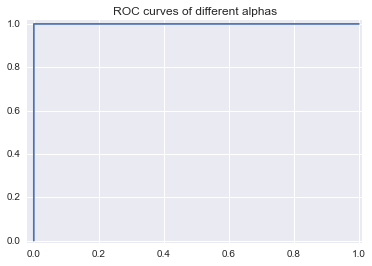

In [26]:
y_true ,y_scores = train.label, predtrain
fpr, tpr, _ = roc_curve(y_true.ravel(), y_scores.ravel())
AUC=(roc_auc_score(y_true, y_scores))
plt.xlim([-0.02,1.01])
plt.ylim([-0.01,1.02])
ax =plt.plot(fpr, tpr)
#leg = zip(alphas,AUC)
plt.title('ROC curves of different alphas')
#l = plt.legend(map(lambda x: 'alpha: '+str(x[0])+' AUC:'+str(round(x[1],3)),leg), loc = 2)
print AUC

0.619088475441


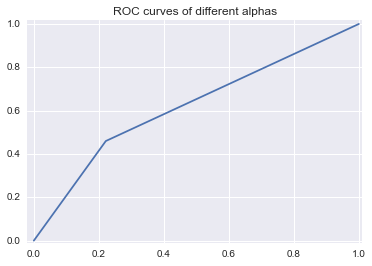

In [29]:
predval= model.predict(validation.drop('label', axis=1))
y_true ,y_scores = validation.label, predval
fpr, tpr, _ = roc_curve(y_true.ravel(), y_scores.ravel())
AUC=(roc_auc_score(y_true, y_scores))
plt.xlim([-0.02,1.01])
plt.ylim([-0.01,1.02])
ax =plt.plot(fpr, tpr)
#leg = zip(alphas,AUC)
plt.title('ROC curves of different alphas')
#l = plt.legend(map(lambda x: 'alpha: '+str(x[0])+' AUC:'+str(round(x[1],3)),leg), loc = 2)
print AUC

In [10]:
fetimp = sorted(zip(list(model.feature_importances_),train.columns.drop('label')),reverse = True)
fetimp[:10]

[(0.14773652258643485, 'shot_distance'),
 (0.14712529199207564, 'seconds_remaining'),
 (0.13843102830120879, 'angle'),
 (0.11143172649736428, 'loc_x'),
 (0.10220667237872853, 'loc_y'),
 (0.09198298372863975, 'minutes_remaining'),
 (0.047685911339429767, 'numpos'),
 (0.047196249030635851, 'period'),
 (0.026430841282935384, 'Dunk'),
 (0.02074972140943785, 'is_home')]

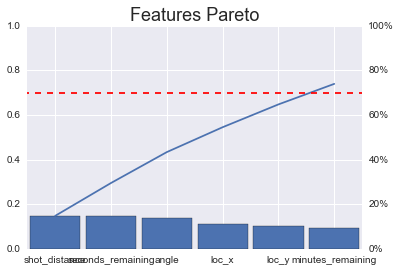

In [11]:
from paretochart import pareto
plt.title('Features Pareto', fontsize=18)
par = pareto(model.feature_importances_,train.columns.drop('label'), limit = 0.7)

# SVM

In [31]:
import sklearn.svm as svm

In [32]:
clf = svm.SVC()
clf.fit(train.drop('label', axis=1), train.label) 
preds= clf.predict(train.drop('label', axis=1))

0.622735658243


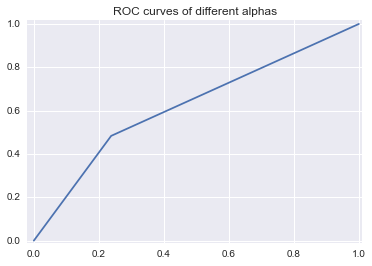

In [33]:
y_true ,y_scores = train.label, preds
fpr, tpr, _ = roc_curve(y_true.ravel(), y_scores.ravel())
AUC=(roc_auc_score(y_true, y_scores))
plt.xlim([-0.02,1.01])
plt.ylim([-0.01,1.02])
ax =plt.plot(fpr, tpr)
#leg = zip(alphas,AUC)
plt.title('ROC curves of different alphas')
#l = plt.legend(map(lambda x: 'alpha: '+str(x[0])+' AUC:'+str(round(x[1],3)),leg), loc = 2)
print AUC

0.616149679371


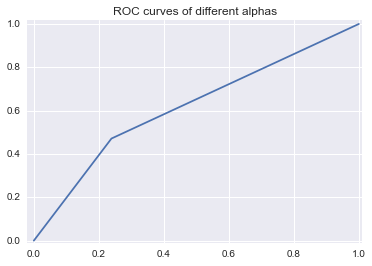

In [35]:
predval= clf.predict(validation.drop('label', axis=1))
y_true ,y_scores = validation.label, predval
fpr, tpr, _ = roc_curve(y_true.ravel(), y_scores.ravel())
AUC=(roc_auc_score(y_true, y_scores))
plt.xlim([-0.02,1.01])
plt.ylim([-0.01,1.02])
ax =plt.plot(fpr, tpr)
#leg = zip(alphas,AUC)
plt.title('ROC curves of different alphas')
#l = plt.legend(map(lambda x: 'alpha: '+str(x[0])+' AUC:'+str(round(x[1],3)),leg), loc = 2)
print AUC

# PCA

In [44]:
train.describe()

,minutes_remaining,period,seconds_remaining,shot_distance,label,loc_x,loc_y,season,is_home,numpos,...,Bank,Reverse,Fadeaway,Back,Alley,Jump,Hook,Slam,Floating,Oop
count,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,...,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000,40663.000000
mean,0.447370,0.485913,0.487614,0.143143,0.450778,0.498159,0.145077,0.511325,0.500209,0.432111,...,0.019182,0.018272,0.021494,0.019797,0.011239,0.649165,0.036151,0.006738,0.027839,0.011239
std,0.288079,0.371546,0.295789,0.115511,0.497577,0.218554,0.097396,0.499878,0.500006,0.389428,...,0.137166,0.133935,0.145025,0.139303,0.105417,0.477237,0.186668,0.081811,0.164512,0.105417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008820,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.000000,0.237288,0.023256,0.000000,0.396000,0.063947,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.416667,0.333333,0.491525,0.139535,0.000000,0.500000,0.101433,1.000000,1.000000,0.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.666667,0.745763,0.267442,1.000000,0.600000,0.226020,1.000000,1.000000,0.714286,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.941860,1.000000,1.000000,0.944873,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
minmax_new_dset
subset = minmax_new_dset[[u'minutes_remaining', u'period', u'seconds_remaining', u'shot_distance', u'loc_x', u'loc_y', u'season', u'is_home', u'numpos',
       u'angle']]

In [86]:
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(subset)
PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_) 

[ 0.22323649  0.22304533]


In [87]:
new = pca.transform(subset)

In [95]:
cols = minmax_new_dset.label.apply(lambda x: 'r' if x==0 else 'g')

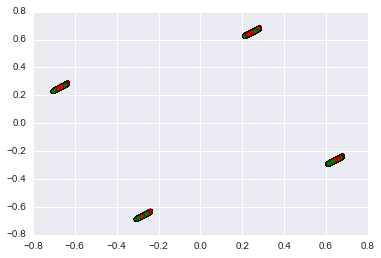

In [97]:
plt.scatter(new[:,0],new[:,1],c=cols)